# Traffic Sign Recognition using CNN and Keras

### Importing libraries

In [50]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Input,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tfb
import pandas as pd
import numpy as np
import cv2

## Unzip File 

In [31]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [32]:
dataset_path = 'traffic_Data'
label_file = pd.read_csv('labels.csv')

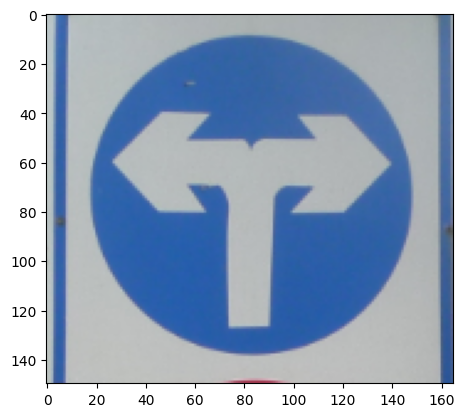

In [33]:
import matplotlib.image as mpimg
img = mpimg.imread("traffic_Data/DATA/23/023_0003.png")
plt.imshow(img)

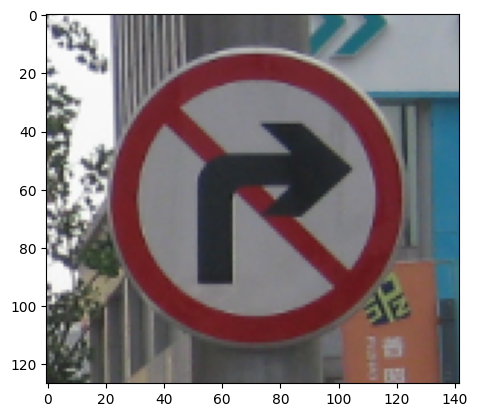

In [34]:
img = mpimg.imread("traffic_Data/DATA/13/013_0001.png")
plt.imshow(img)

In [35]:
label_file.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [36]:
label_file.tail()

,ClassId,Name
53,53,Give Way
54,54,No stopping
55,55,No entry
56,56,Unknown7
57,57,Unknown8


In [71]:
train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    image_size=(228, 228), 
    seed=123
)
val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    image_size=(228, 228), 
    seed=123
)

Found 6164 files belonging to 2 classes.
Using 4932 files for training.
Found 6164 files belonging to 2 classes.
Using 1232 files for validation.


In [72]:
print(train_ds.class_names)

['DATA', 'TEST']


### Normalize data

## Building the model

In [73]:
model = Sequential()

In [74]:
model.add(Conv2D(32,(3,3),input_shape=(228,228,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(len(label_file),activation='softmax'))

In [75]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 226, 226, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 113, 113, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 113, 113, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 200704)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │      51,380,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 58)                  │           7,482 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,441,786 (196.23 MB)

 Trainable params: 51,441,018 (196.23 MB)

 Non-trainable params: 768 (3.00 KB)

## Plot of the model

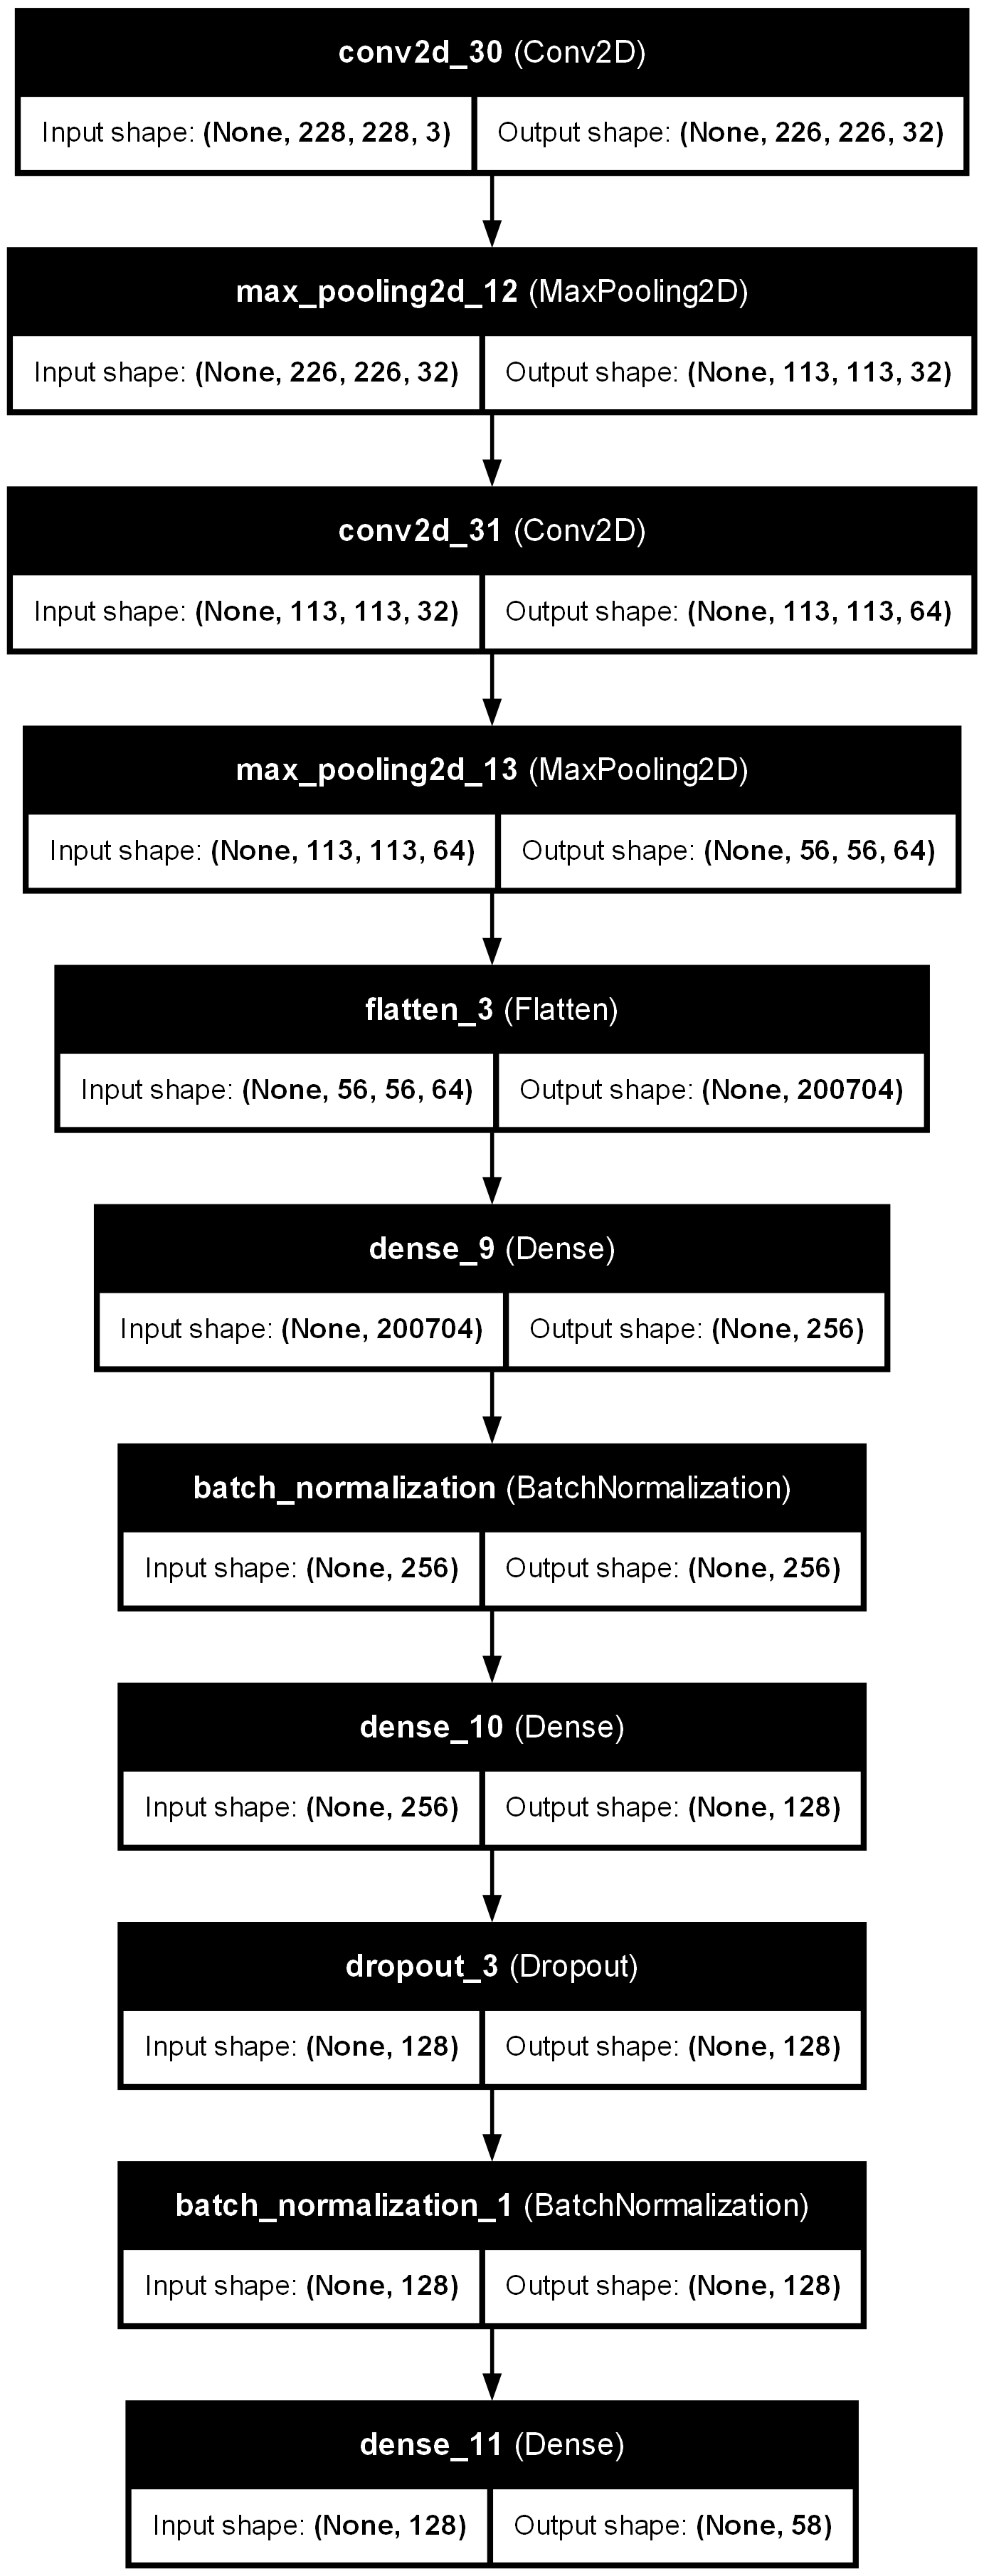

In [76]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [86]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

In [87]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
 
 
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.92:
            print('\n Validation accuracy has reached upto \
                      92% so, stopping further training.')
            self.model.stop_training = True

## Training the model

In [88]:
history = model.fit(train_ds, 
                 validation_data=val_ds, 
                 epochs=10, 
                 callbacks = myCallback()) 

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.4062 - loss: 3.2797 - val_accuracy: 0.8255 - val_loss: 0.8016
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8436 - loss: 0.8668 - val_accuracy: 0.6396 - val_loss: 2.1192
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 259s 2s/step - accuracy: 0.8558 - loss: 0.4956 - val_accuracy: 0.8182 - val_loss: 0.6112
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8992 - loss: 0.2646 - val_accuracy: 0.8279 - val_loss: 0.5979
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.8712 - loss: 0.3536 - val_accuracy: 0.8685 - val_loss: 0.3286
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 265s 2s/step - accuracy: 0.9061 - loss: 0.2345 - val_accuracy: 0.8807 - val_loss: 0.2926
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.9353 - loss: 0.1588 - val_accuracy: 0.7346 - val_loss: 1.0810
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 128s 823ms/step - accuracy: 0.9289 - loss: 0.1794 - val_a

## Plotting the accuracy and loss of the model

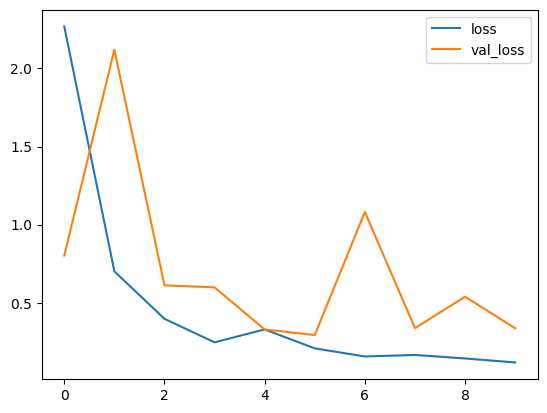

In [91]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['loss', 'val_loss'], loc='upper right') 
  


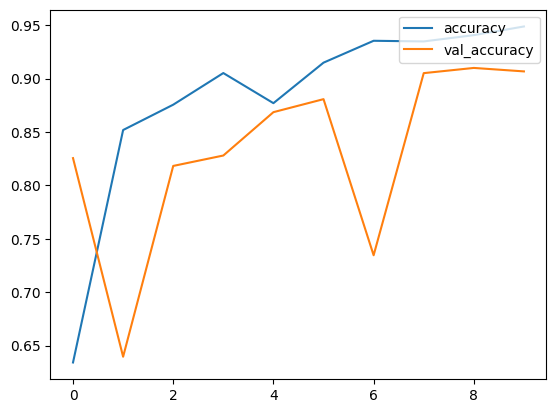

In [92]:
# Accuracy 
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['accuracy', 'val_accuracy'], loc='upper right') 